# **Project about network intrusion detection**

## About

*   Institution:      Universitat Autònoma de Barcelona (UAB)
*   Academic year:    2025
*   Subject:          Data Engineering (AI Degree)
*   Students:         Piotr Mateusz Bonar, Maddox Carl Hurlbert, Sonia Serra Grivina

## Motivation

With the rise in **cyber threats** and the **growing complexity** of network traffic, detecting intrusions in real time has become critical, so this project aims to explore intelligent machine learning techniques to **enhance security and proactively defend against evolving cyber-attacks**.

# **Introduction**

## Project goal

The objective of this project is to develop an effective **network intrusion detection system** using the NUSW-NB15 dataset by applying machine learning techniques **to spot, identify and classify malicious traffic patterns** accurately.

## Research questions


---

**1.**  Can dimensionality reduction techniques like PCA improve the **performance** of intrusion detection models?

**2.**  How effective are clustering (K-Means) and classification (KNN) algorithms in **distinguishing** between normal and malicious network traffic?

**3.**  Can a collaborative filtering-based recommender system provide meaningful insights or predictions about **potential threats** based on historical attack patterns?

**4.**   What are the **strengths and limitations** of each technique in the context of network intrusion detection using the NUSW-NB15 dataset?

---

# **About the dataset**

## From



*   The UNSW-NB15 dataset was developed by the **Australian Centre for Cyber Security (ACCS) at the University of New South Wales (UNSW) Canberra**, led by **Dr. Nour Moustafa and Dr. Jill Slay**.
*   It addresses the limitations of older datasets like KDD99 and NSL-KDD by providing a more comprehensive **representation of modern network traffic and contemporary low-footprint attacks**.

## Description

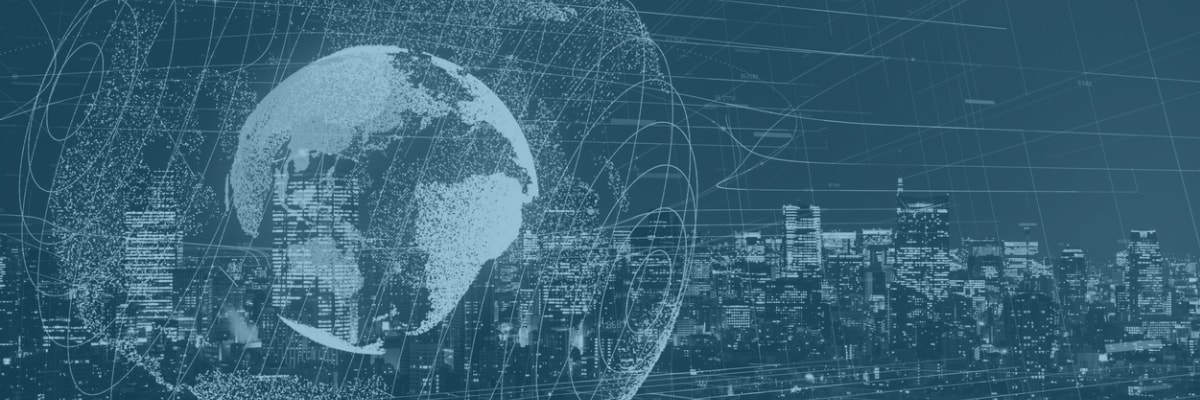

---
*   The UNSW-NB15 dataset is a **large-scale benchmark for network intrusion detection research**
*    It contains over 2.5 million records, each **described by 49 features** (extracted using network security tools like Argus and Bro-IDS, now Zeek) that capture various network traffic characteristics, such as IP addresses, ports, protocols, packet counts, and flow statistics
*    Argus and Zeek are network monitoring tools that apply algorithms to analyze traffic: Argus focuses on tracking network connections and flow metrics, while Zeek performs deep protocol analysis to detect behavioral anomalies and threats
*   Each record is labeled as either normal or as one of nine attack categories: **Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, and Worms**
*   The dataset is split into a training set (175,341 records) and a testing set (82,332 records)
*   It offers a **diverse mix of normal and attack traffic** for developing and evaluating machine learning models
---

## How is it done

*   The UNSW-NB15 dataset incorporates synthetic attack data generated using the IXIA PerfectStorm tool—artificially generated traffic designed to **mimic real-world modern cyber threats alongside the network traffic**.
*   This hybrid approach allows the simulation of diverse intrusion scenarios, facilitating the development and evaluation of intrusion detection systems (IDS) without compromising privacy or requiring extensive real-world data collection.
*   By **combining synthetic attacks with real normal traffic**, the dataset provides a balanced environment for training and testing IDS models.

## Previous work and evidence

1.   Early studies applied Principal Component Analysis (PCA) to reduce feature dimensionality in intrusion detection systems, enhancing detection accuracy on datasets like KDD Cup and NSL-KDD. ([PCA on Benchmark Datasets (KDD Cup & NSL-KDD)](https://www.researchgate.net/publication/50281791_Feature_Reduction_using_Principal_Component_Analysis_for_Effective_Anomaly-Based_Intrusion_Detection_on_NSL-KDD))

2.   Integrating Decision Tree classifiers with PCA-transformed data has shown improved attack detection rates, though some implementations experienced increased training times due to the complexity introduced by dimensionality reduction. ([Decision Tree Classification with PCA](https://www.sciencedirect.com/science/article/pii/S2667305324001169))

3.    Machine learning-driven cybersecurity exploratory data analysis (EDA) has been utilized to cluster attack and normal label patterns, providing insights into network traffic behaviors. ([Exploratory Data Analysis (EDA) with PCA](https://github.com/Karan-D-Software/Machine-Learning-Network-Security))

4.    The SPIDER model leverages PCA for dimensionality reduction, enhancing classification accuracy and reducing training time in network intrusion detection systems. ([SPIDER Model Utilizing PCA](https://www.sciencedirect.com/science/article/pii/S1319157822003706))

## Download

🔗 [UNSW-NB15 Dataset](https://research.unsw.edu.au/projects/unsw-nb15-dataset)

## Methodology and approach

The project follows a structured machine learning pipeline: starting with data preprocessing and exploration, we apply **PCA** for dimensionality reduction, then train and evaluate models using **K-Means for unsupervised attack pattern discovery and KNN for classification**. Finally, we implement a **collaborative filtering system** to suggest potential threat profiles based on **historical intrusion data**.

# **Data preprocessing**

## Data loading and cleaning

In [ ]:
# Library loads
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # we use this since many features were skewed
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
import scipy.stats
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

In [ ]:
# Load data (already in frame type)
train = pd.read_csv("UNSW_NB15_training-set.csv")
test = pd.read_csv("UNSW_NB15_testing-set.csv")
features = pd.read_csv("NUSW-NB15_features.csv", encoding="ISO-8859-1")

## Identifying feature strengths

In [ ]:
# View some variable descriptions
features # add .head() to show few rows

,id,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [ ]:
train.info() # 45 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
# Drop irrelevant columns
X = train.drop(columns=["label", "attack_cat", "id"])
y = train["label"]

In [ ]:
train.isnull().sum().sum() # No missing values

np.int64(0)

In [ ]:
train.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


<Axes: xlabel='service'>

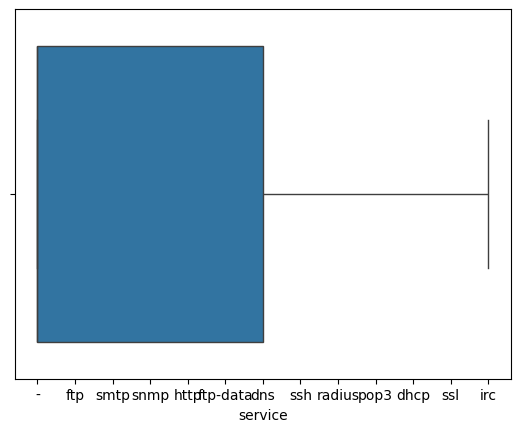

In [ ]:
sns.boxplot(x=train["service"])

In [ ]:
# Identify categorical and numerical columns
categorical_cols = ['proto', 'service', 'state']
categorical_train = train[categorical_cols]
categorical_train # 3 columns

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN
...,...,...,...
175336,udp,dns,INT
175337,tcp,-,FIN
175338,udp,dns,INT
175339,udp,dns,INT


In [ ]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.difference(categorical_cols)
numerical_train = train[numerical_cols]
numerical_train # 39 columns

,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,...,sload,sloss,smean,spkts,stcpb,sttl,swin,synack,tcprtt,trans_depth
0,0.000000,1,1,1,0,0,1,1,1,1,...,1.415894e+04,0,43,6,621772692,252,255,0.000000,0.000000,0
1,0.000000,1,1,2,0,0,1,1,6,43,...,8.395112e+03,2,52,14,1417884146,62,255,0.000000,0.000000,0
2,0.050439,2,1,3,0,0,1,2,6,7,...,1.572272e+03,1,46,8,2116150707,62,255,0.061458,0.111897,0
3,0.000000,2,1,3,0,1,1,2,1,1,...,2.740179e+03,1,52,12,1107119177,62,255,0.000000,0.000000,0
4,0.057234,2,1,40,0,0,2,2,39,43,...,8.561499e+03,2,53,10,2436137549,254,255,0.071147,0.128381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000000,24,13,24,0,0,24,24,24,24,...,5.066666e+07,0,57,2,0,254,0,0.000000,0.000000,0
175337,0.062545,1,1,2,0,0,1,1,1,1,...,8.826286e+03,2,62,10,3518776216,254,255,0.036895,0.099440,0
175338,0.000000,3,3,13,0,0,3,3,12,12,...,5.066666e+07,0,57,2,0,254,0,0.000000,0.000000,0
175339,0.000000,30,14,30,0,0,30,30,30,30,...,5.066666e+07,0,57,2,0,254,0,0.000000,0.000000,0


Label Distribution:
 label
0     56000
1    119341
Name: count, dtype: int64


<ipython-input-13-1700d7a63fcd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


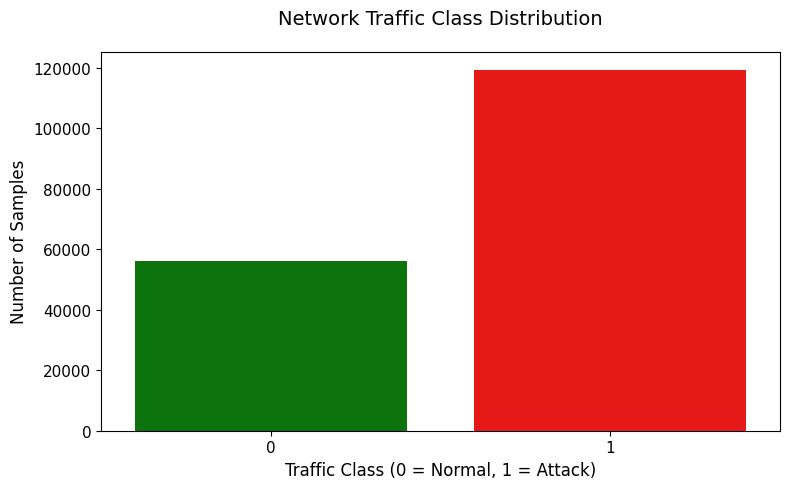

In [ ]:
# Get label distribution
label_counts = train['label'].value_counts().sort_index()
print("Label Distribution:\n", label_counts)

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x=label_counts.index.astype('str'),
    y=label_counts.values,
    palette=['green', 'red'],
    saturation=0.8
)

plt.title("Network Traffic Class Distribution", fontsize=14, pad=20)
plt.xlabel("Traffic Class (0 = Normal, 1 = Attack)", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

## Correlation analysis

In [ ]:
# Calculate absolute correlation matrix
corr_matrix = numerical_train.corr().abs()

# Get upper triangle of correlation matrix (avoids duplicates)
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Apply mask and process correlations
sorted_corr = (corr_matrix.where(upper_triangle)
               .unstack()
               .sort_values(ascending=False)
               .dropna())

# Filter strong correlations
strong_corr = sorted_corr[(sorted_corr > 0.9) & (sorted_corr < 1)]

# Convert to DataFrame
strong_corr_df = pd.DataFrame(strong_corr, columns=['R^2'])

print("Strong Correlations:")
strong_corr_df

Strong Correlations:


,,R^2
dloss,dbytes,0.996504
sloss,sbytes,0.996109
swin,dwin,0.990140
ct_srv_src,ct_srv_dst,0.980323
dpkts,dloss,0.978636
ct_srv_dst,ct_dst_src_ltm,0.972370
dpkts,dbytes,0.971907
spkts,sloss,0.971069
ct_srv_src,ct_dst_src_ltm,0.967138
spkts,sbytes,0.963791


In [ ]:
len(numerical_train.columns)

39

In [ ]:
# Remove highly correlated features (keep one from each pair)
features_to_remove = ['dbytes', 'sbytes', 'swin', 'ct_srv_src', 'dpkts',
                     'ct_dst_src_ltm', 'spkts', 'ct_dst_ltm', 'tcprtt', 'sinpkt']
print(len(features_to_remove))
numerical_train = numerical_train.drop(columns=features_to_remove)
corr = numerical_train.corr()

10


In [ ]:
len(numerical_train.columns)

29

<Axes: >

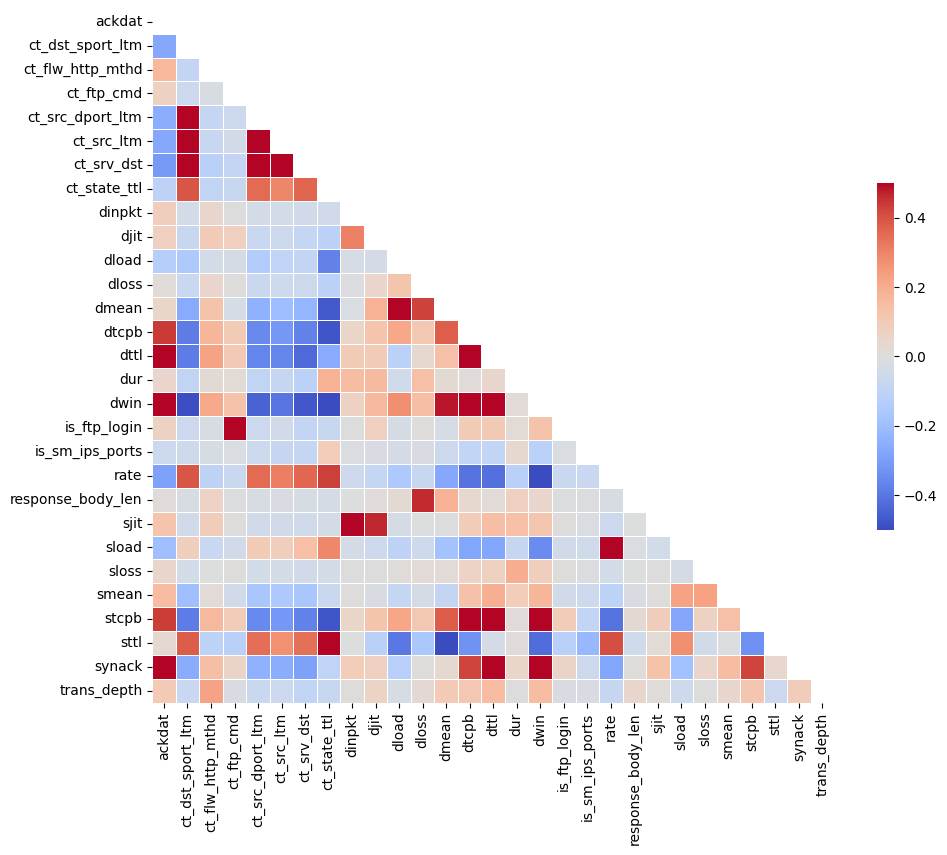

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with adjusted color scale
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmin=-0.5,
    vmax=0.5,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [ ]:
len(numerical_train.columns)

29

## Dimensionality reduction with PCA

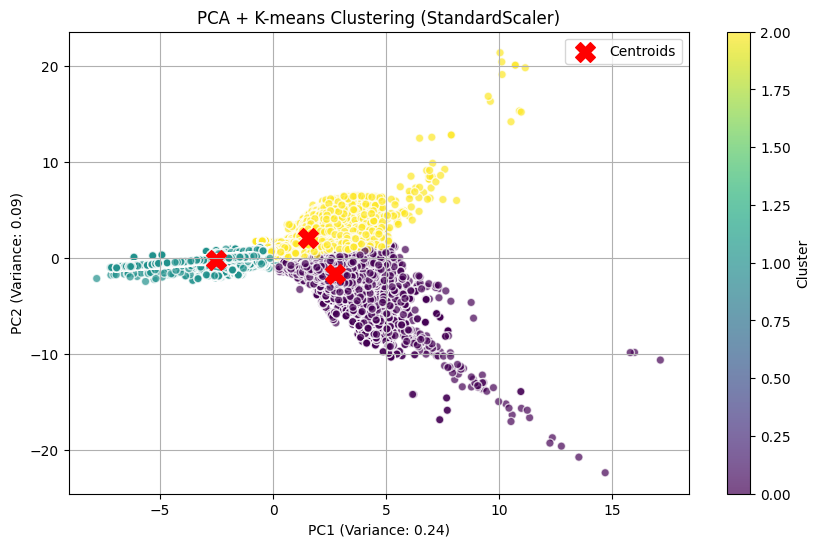

In [ ]:
# Standardize data
X_standardized = StandardScaler().fit_transform(numerical_train)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# K-means on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters,
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

# Add centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='X', s=200, c='red',
    label='Centroids'
)

# Labels and title
plt.xlabel(f"PC1 (Variance: {pca.explained_variance_ratio_[0]:.2f})")
plt.ylabel(f"PC2 (Variance: {pca.explained_variance_ratio_[1]:.2f})")
plt.title("PCA + K-means Clustering (StandardScaler)")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
pca.explained_variance_ratio_.sum()

np.float64(0.3319614988929822)

The data points are clustered very close to each other in this PCA plot using *StandardScaler* standardization technique, meaning they may not generalize well to new data. Additionally, the extremely low variance retained by the first two principal components does not capture meaningful data structure.

Explained variance by each component: [0.56124304 0.17422665]
Cumulative explained variance: [0.56124304 0.73546969]


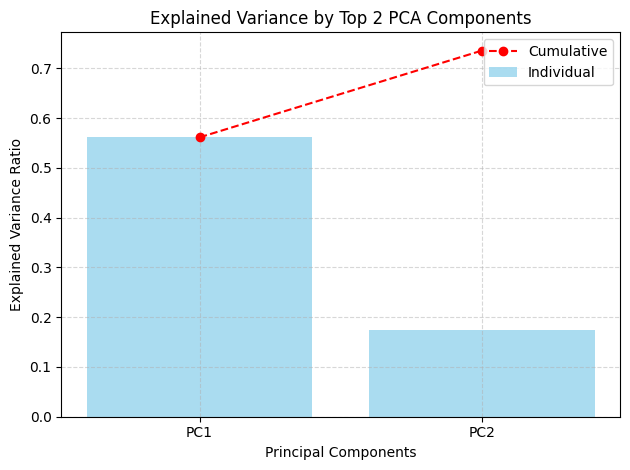

In [ ]:
# Standardize using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(numerical_train)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"Explained variance by each component: {explained_var}")
print(f"Cumulative explained variance: {cumulative_var}")

# Plot explained variance for 2 components
plt.bar(['PC1', 'PC2'], explained_var, color='skyblue', alpha=0.7, label='Individual')
plt.plot(['PC1', 'PC2'], cumulative_var, color='red', linestyle='--', marker='o', label='Cumulative')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Top 2 PCA Components')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
X_pca

array([[ 0.72997018,  0.55996775],
       [ 1.10128196, -0.13405808],
       [ 1.12481891, -0.09070928],
       ...,
       [-0.678818  ,  0.07750714],
       [-0.84206946,  0.14192351],
       [-0.84633876,  0.14401438]])

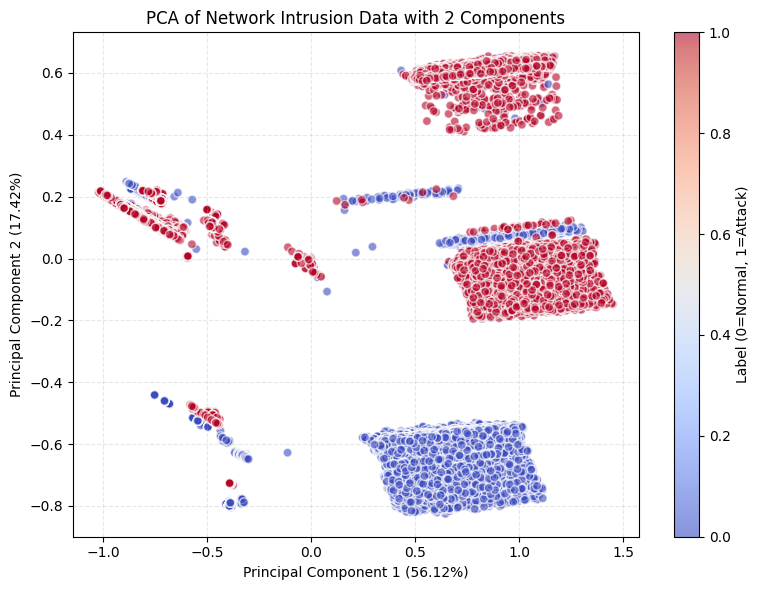

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=train['label'], cmap='coolwarm', alpha=0.6, edgecolors='w', s=40
)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('PCA of Network Intrusion Data with 2 Components')
plt.colorbar(label='Label (0=Normal, 1=Attack)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
train[['attack_cat', 'label']].value_counts()

,,count
attack_cat,label,
Normal,0,56000
Generic,1,40000
Exploits,1,33393
Fuzzers,1,18184
DoS,1,12264
Reconnaissance,1,10491
Analysis,1,2000
Backdoor,1,1746
Shellcode,1,1133


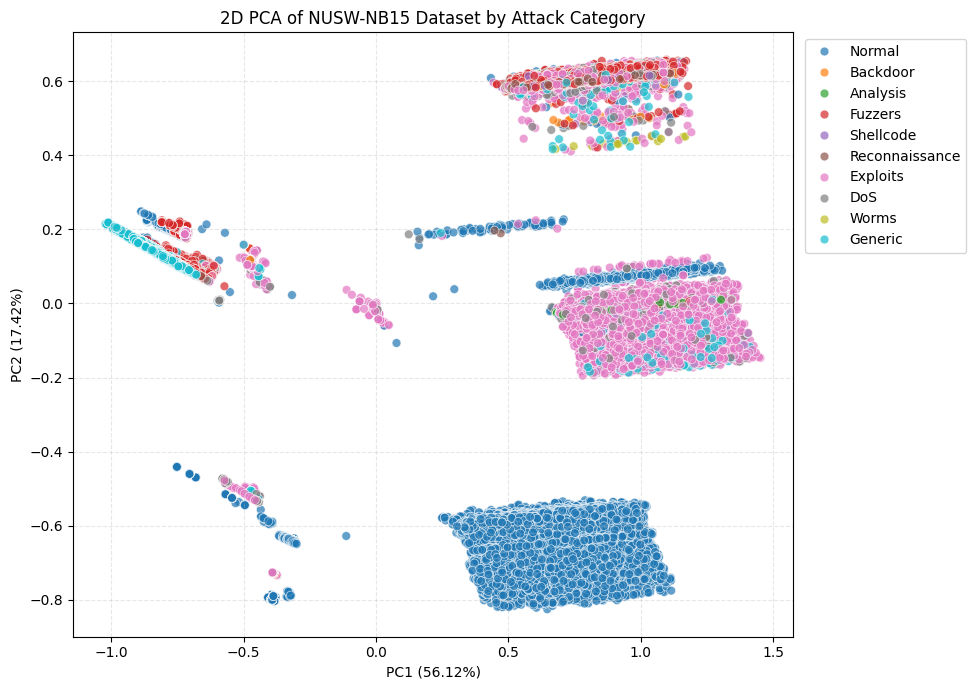

In [ ]:
import seaborn as sns

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['attack_cat'] = train['attack_cat']

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2',
    hue='attack_cat', palette='tab10', s=40, alpha=0.7
)
plt.title('2D PCA of NUSW-NB15 Dataset by Attack Category')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
print(f"Up to here, 2 components explain {pca.explained_variance_ratio_.sum()*100:.2f}% of the variance")

Up to here, 2 components explain 73.55% of the variance


Explained variance by each component: [0.56124304 0.17422665 0.06266251]
Cumulative explained variance: [0.56124304 0.73546969 0.79813219]


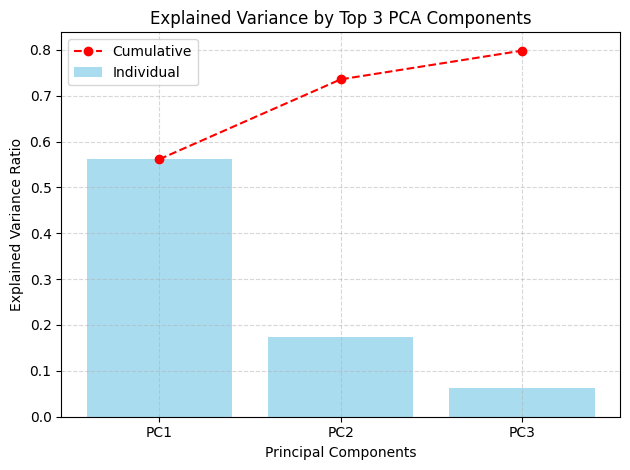

In [ ]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca2 = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"Explained variance by each component: {explained_var}")
print(f"Cumulative explained variance: {cumulative_var}")

# Plot explained variance for 3 components
plt.bar(['PC1', 'PC2', 'PC3'], explained_var, color='skyblue', alpha=0.7, label='Individual')
plt.plot(['PC1', 'PC2', 'PC3'], cumulative_var, color='red', linestyle='--', marker='o', label='Cumulative')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Top 3 PCA Components')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
X_pca2

array([[ 0.72997018,  0.55996775, -0.15244279],
       [ 1.10128196, -0.13405808,  0.00188255],
       [ 1.12481891, -0.09070928,  0.01908408],
       ...,
       [-0.678818  ,  0.07750714, -0.14149016],
       [-0.84206946,  0.14192351,  0.48461432],
       [-0.84633876,  0.14401438,  0.49872453]])

> **IMPORTANT**: Use this matrix of reduced features *X_pca2* for modeling intrustion detections!!

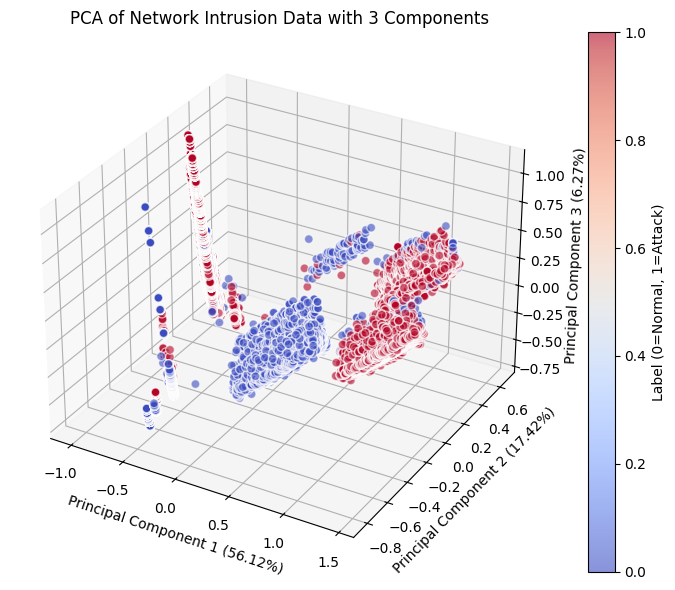

In [ ]:
# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3D PCA
scatter = ax.scatter(
    X_pca2[:, 0], X_pca2[:, 1], X_pca2[:, 2],
    c=train['label'], cmap='coolwarm', alpha=0.6, edgecolors='w', s=40
)

# Labels and title
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)') # 1st eigenvector
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)') # 2nd eigenvector
ax.set_zlabel(f'Principal Component 3 ({pca.explained_variance_ratio_[2]*100:.2f}%)') # 3rd eigenvector
ax.set_title('PCA of Network Intrusion Data with 3 Components')

# Color bar
fig.colorbar(scatter, ax=ax, label='Label (0=Normal, 1=Attack)')

# Grid and layout
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print(f"Up to here, 3 components explain {pca.explained_variance_ratio_.sum()*100:.2f}% of the variance")

Up to here, 3 components explain 79.81% of the variance


In [ ]:
# Feature Importance Analysis

# PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose the components matrix
    columns=['PC1', 'PC2', 'PC3'],
    index=numerical_train.columns
)

# Top features for PC1
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)
print("Top features for PC1:")
print(top_pc1)

# Top features for PC2
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(5)
print("\nTop features for PC2:")
print(top_pc2)

# Top features for PC3
top_pc3 = loadings['PC3'].abs().sort_values(ascending=False).head(5)
print("\nTop features for PC3:")
print(top_pc3)

Top features for PC1:
dwin     0.633018
dttl     0.454616
stcpb    0.340066
dtcpb    0.340029
sttl     0.257734
Name: PC1, dtype: float64

Top features for PC2:
sttl            0.795104
dttl            0.518086
dmean           0.187612
ct_state_ttl    0.173988
dload           0.114044
Name: PC2, dtype: float64

Top features for PC3:
ct_srv_dst          0.470027
ct_src_dport_ltm    0.440501
ct_src_ltm          0.375701
ct_dst_sport_ltm    0.317480
stcpb               0.277538
Name: PC3, dtype: float64


# **Model Training and Analysis**

## K-Means Clustering Algorithm

We found that K-Means is not particularly useful for this project, as the data is already labeled into dangerous and safe network traffic scenarios, and our goal is to build a classifier based on this data. K-Means works far better in unsupervised learning scenarios, as it does not use labels during training. Instead, it clusters data points based on similarity (e.g., distance), not on whether they represent attacks or not. However, we believe that K-Means could still be helpful for exploratory analysis. How? By visualizing the underlying structure of the data or by serving as a preprocessing step to reduce noise before applying supervised learning methods. Additionally, K-Means proves useful in the later clustering phase of the recommender system section.

In [ ]:
X_pca2 # recall this matrix

array([[ 0.72997018,  0.55996775, -0.15244279],
       [ 1.10128196, -0.13405808,  0.00188255],
       [ 1.12481891, -0.09070928,  0.01908408],
       ...,
       [-0.678818  ,  0.07750714, -0.14149016],
       [-0.84206946,  0.14192351,  0.48461432],
       [-0.84633876,  0.14401438,  0.49872453]])

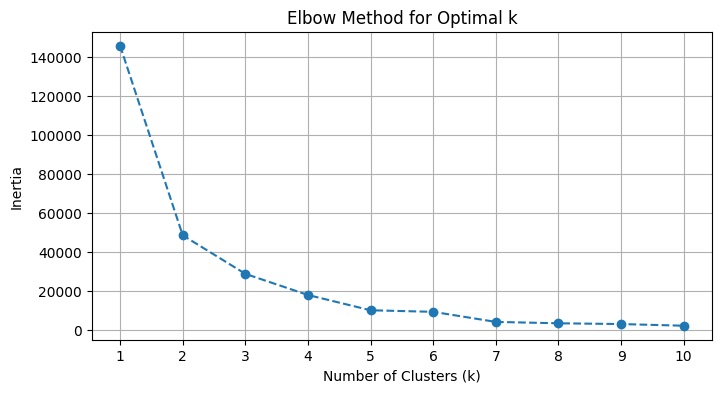

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different cluster counts
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca2)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

*The elbow method indicates a slowdown in the slope for k ∈ [3,5], pointing to a likely optimal cluster range.*

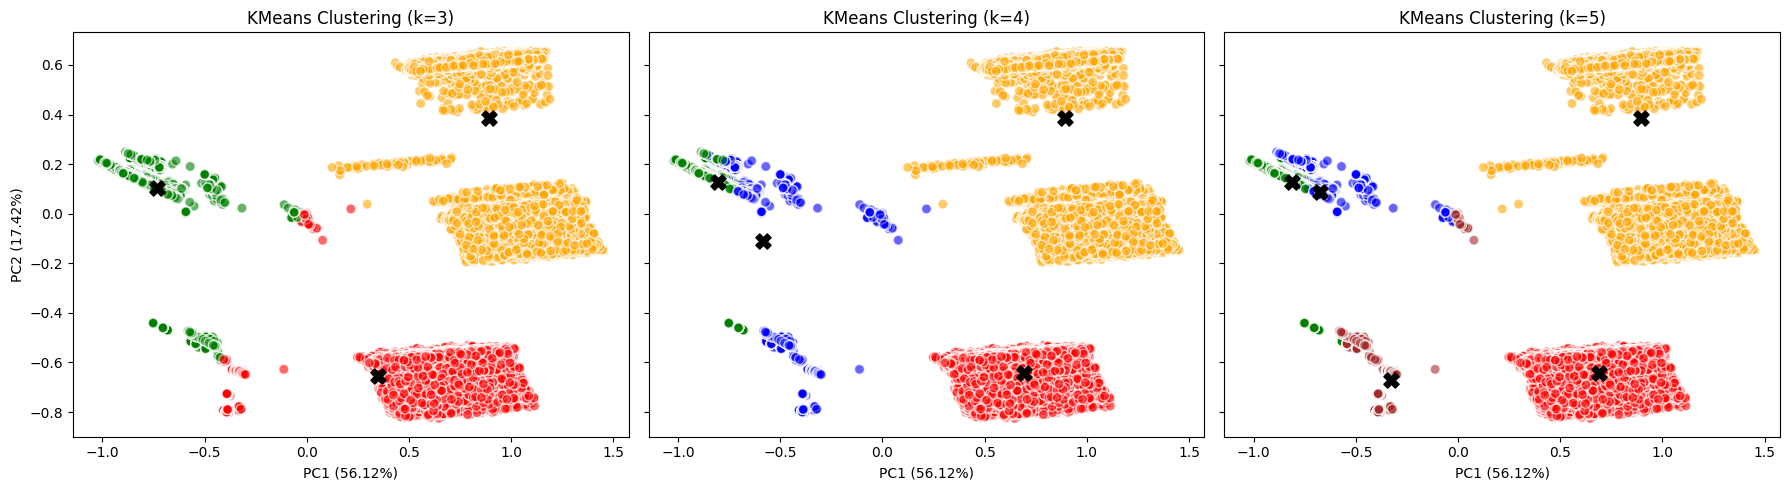

In [ ]:
# Ensure X_pca2 is a DataFrame with string column names
X_pca2 = pd.DataFrame(X_pca2)
X_pca2.columns = X_pca2.columns.astype(str)

# Define color maps for clusters (up to k=5)
color_maps = {
    3: ["orange", "green", "red"],
    4: ["orange", "green", "red", "blue"],
    5: ["orange", "green", "red", "blue", "brown"],
}

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

for i, k in enumerate(range(3, 6)):
    # Temporarily drop 'cluster' column if it exists to avoid conflicts
    X_temp = X_pca2.drop(columns=['cluster'], errors='ignore').copy()

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_temp)
    X_temp['cluster'] = clusters  # Assign cluster labels

    # Extract centroids
    centroids = kmeans.cluster_centers_

    # Plot clusters and centroids
    ax = axes[i]
    scatter = ax.scatter(
        X_temp['0'], X_temp['1'],
        c=[color_maps[k][label] for label in clusters],
        s=50, alpha=0.6, edgecolors='w'
    )

    # Plot centroids
    ax.scatter(
        centroids[:, 0], centroids[:, 1],
        c='black', s=120, marker='X', label='Centroid'
    )

    # Add titles and labels
    ax.set_title(f'KMeans Clustering (k={k})')
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    if i == 0:
        ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')

plt.tight_layout()
plt.show()

Therefory, note k=3 will provide optimal separation and generalization since higher values led to tightly packed centroids, risking overfitting.

In [ ]:
# Consider k=3
kmeans = KMeans(n_clusters=3, random_state=42)
X_pca2['cluster'] = kmeans.fit_predict(X_pca2)
X_pca2

,0,1,2,cluster
0,0.729970,0.559968,-0.152443,0
1,1.101282,-0.134058,0.001883,0
2,1.124819,-0.090709,0.019084,0
3,0.846916,-0.015153,-0.271680,0
4,0.745559,0.627563,0.254690,0
...,...,...,...,...
175336,-0.804622,0.127779,0.340260,1
175337,1.032655,0.614842,0.109780,0
175338,-0.678818,0.077507,-0.141490,1
175339,-0.842069,0.141924,0.484614,1


In [ ]:
# Cross-tabulate clusters vs. true labels
cluster_analysis_label = pd.crosstab(
    X_pca2['cluster'],
    y,  # use 'label' for binary (0=normal, 1=any of the 9 attacks)
    margins=True
)
cluster_analysis_label

label,0,1,All
cluster,,,
0,9794,40825,50619
1,3794,78124,81918
2,42412,392,42804
All,56000,119341,175341


In [ ]:
# Add attack category (label type 1)
X_pca2['attack_cat'] = train['attack_cat'].values

cluster_analysis_attack = pd.crosstab(
    X_pca2['cluster'],
    X_pca2['attack_cat'],
    margins=True
)
cluster_analysis_attack

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms,All
cluster,,,,,,,,,,,
0,564,272,2281,19689,11761,486,9794,5100,557,115,50619
1,1433,1459,9900,13455,6408,39511,3794,5367,576,15,81918
2,3,15,83,249,15,3,42412,24,0,0,42804
All,2000,1746,12264,33393,18184,40000,56000,10491,1133,130,175341


## K-Nearest Neighbors Classification (supervised learning algorithm)

In [ ]:
X_pca2 = X_pca2[['0','1','2']] # select only pca loadings columns
X_pca2

,0,1,2
0,0.729970,0.559968,-0.152443
1,1.101282,-0.134058,0.001883
2,1.124819,-0.090709,0.019084
3,0.846916,-0.015153,-0.271680
4,0.745559,0.627563,0.254690
...,...,...,...
175336,-0.804622,0.127779,0.340260
175337,1.032655,0.614842,0.109780
175338,-0.678818,0.077507,-0.141490
175339,-0.842069,0.141924,0.484614


In [ ]:
y # categorical variable 'label': 0=normal vs 1=attack

,label
0,0
1,0
2,0
3,0
4,0
...,...
175336,1
175337,1
175338,1
175339,1


In [ ]:
# Split your PCA data and labels
X_train, X_test, y_train, y_test = train_test_split(X_pca2, y, test_size=0.3, random_state=42)

# Time your prediction
from time import time
start = time()
knn = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Prediction time: {time()-start:.2f}s")

# Check input shapes
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Prediction time: 4.63s
Train shape: (122738, 3), Test shape: (52603, 3)


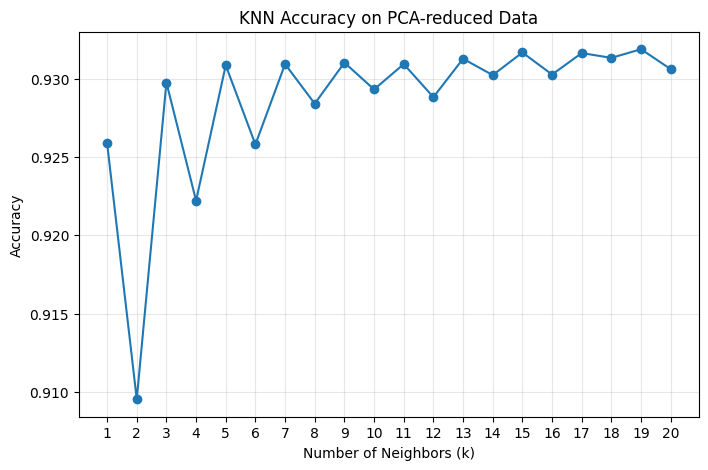

In [ ]:
# Try different values of k
k_values = list(range(1, 21))
accuracies = []

for k in k_values: # so 20 loops * predictiontimeabove
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) # takes 1'20'' approximately
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy on PCA-reduced Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

## Accuracy, Recall and F1 score metrics

In [ ]:
y_test, y_pred

(15482     0
 133349    1
 80485     1
 29972     0
 18339     0
          ..
 18386     0
 156181    1
 122725    1
 27731     0
 88528     1
 Name: label, Length: 52603, dtype: int64,
 array([0, 1, 1, ..., 1, 0, 1]))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.930612


The categorical variable `label` has been converted for binary classification, with class 1 (Attack) treated as the positive class. All metrics are calculated to identify attacks (1) versus normal traffic (0).

In [ ]:
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")

Recall: 0.976808
F1 Score: 0.950441


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Normal', 'Attack'], output_dict=True)
pd.DataFrame(report)

,Normal,Attack,accuracy,macro avg,weighted avg
precision,0.943791,0.925461,0.930612,0.934626,0.931305
recall,0.831922,0.976808,0.930612,0.904365,0.930612
f1-score,0.884333,0.950441,0.930612,0.917387,0.929363
support,16772.000000,35831.000000,0.930612,52603.000000,52603.000000


## Confusion Matrix

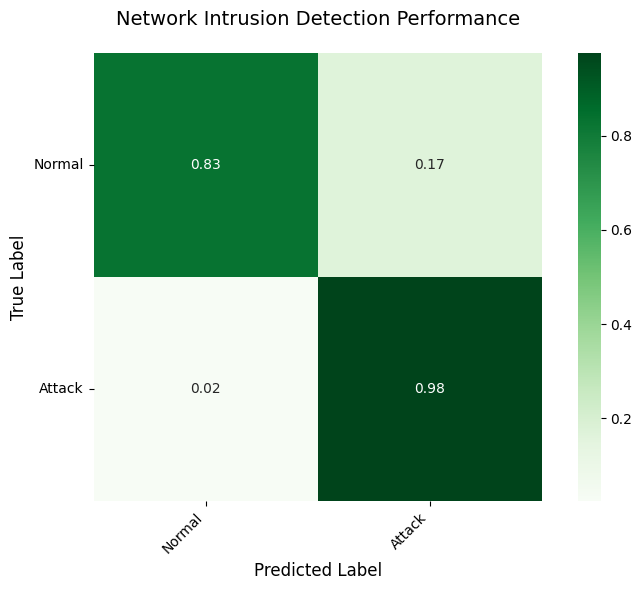

In [ ]:
def plot_cm(y_true, y_pred, classes=None, normalize=False, cmap='Greens'):

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    plt.figure(figsize=(8,6))

    ax = sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap,
                    cbar=True, square=True,
                    xticklabels=classes,
                    yticklabels=classes)

    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Network Intrusion Detection Performance', fontsize=14, pad=20)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

plot_cm(y_test, y_pred,
       classes=['Normal', 'Attack'],
       normalize=True)

# **Collaborative filtering for recommender systems**

## User-attack interaction matrix

### Are services relevant for detecting attacks?

In [ ]:
# Attack distribution
data = train[['id', 'attack_cat', 'label']]
data

,id,attack_cat,label
0,1,Normal,0
1,2,Normal,0
2,3,Normal,0
3,4,Normal,0
4,5,Normal,0
...,...,...,...
175336,175337,Generic,1
175337,175338,Shellcode,1
175338,175339,Generic,1
175339,175340,Generic,1


In [ ]:
# Attack frequency
counts = train['attack_cat'].value_counts()
attack_stats = pd.DataFrame({'count': counts})
attack_stats['percentage']=(attack_stats['count'] / attack_stats['count'].sum()*100).round(2)
attack_stats

,count,percentage
attack_cat,,
Normal,56000,31.94
Generic,40000,22.81
Exploits,33393,19.04
Fuzzers,18184,10.37
DoS,12264,6.99
Reconnaissance,10491,5.98
Analysis,2000,1.14
Backdoor,1746,1.00
Shellcode,1133,0.65


In [ ]:
# Attack records
attack_df = train[train['label'] == 1]
attack_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
47911,47912,0.000009,ddp,-,INT,2,0,200,0,111111.107200,...,1,4,0,0,0,2,4,0,Backdoor,1
47912,47913,0.000009,ipv6-frag,-,INT,2,0,200,0,111111.107200,...,2,7,0,0,0,2,7,0,Backdoor,1
47913,47914,0.000009,cftp,-,INT,2,0,200,0,111111.107200,...,1,6,0,0,0,1,6,0,Backdoor,1
47914,47915,0.000003,wsn,-,INT,2,0,200,0,333333.321500,...,2,7,0,0,0,2,6,0,Backdoor,1
47915,47916,0.000008,pvp,-,INT,2,0,200,0,125000.000300,...,1,4,0,0,0,11,4,0,Backdoor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
# Attacked users
len(attack_df['id'])

119341

In [ ]:
print(f"The {((len(attack_df['id'])/len(train))*100):.2f}% of the users in the dataset had been attacked")

The 68.06% of the users in the dataset had been attacked


Consider the channel through which the user connects as being relevant for identifying potential attacks in the network

In [ ]:
attack_df['service'].value_counts()

,count
service,
-,57656
dns,39801
http,13376
smtp,3479
ftp,2210
ftp-data,1443
pop3,1101
dhcp,94
snmp,79


In [ ]:
total_attacks = attack_df['service'].value_counts().sum()
total_attacks

np.int64(119341)

The frequency of different services used by users reveals indeed their importance in attack detection. Services like `dns` and `http` are the most frequently used, with dns occurring 39,801 times and http 13,376 times, whereas `ssh` and `radius` are less common

In [ ]:
nan_service = attack_df['service'].value_counts().get('-', 0)
nan_service

np.int64(57656)

The 57656 missing values correspond to the sparse elements in `service` column

In [ ]:
# Attacks that were registered in some service
attacks_in_service = total_attacks - nan_service
attacks_in_service

np.int64(61685)

In [ ]:
print(f"{(attacks_in_service/total_attacks)*100:.2f}% of the attacks are occurred in a service, whereas {(nan_service/total_attacks)*100:.2f}% under unknown channel")

51.69% of the attacks are occurred in a service, whereas 48.31% under unknown channel


In [ ]:
# Create interaction matrix
interaction_matrix = pd.crosstab(attack_df['service'],attack_df['attack_cat']).replace(0, np.nan)
interaction_matrix

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
service,,,,,,,,,
-,1436.0,1647.0,10473.0,17206,16453.0,504.0,8788.0,1133.0,16.0
dhcp,NaN,NaN,33.0,52,NaN,9.0,NaN,NaN,NaN
dns,NaN,NaN,107.0,185,358.0,39116.0,35.0,NaN,NaN
ftp,NaN,5.0,50.0,1615,537.0,3.0,NaN,NaN,NaN
ftp-data,NaN,NaN,8.0,1435,NaN,NaN,NaN,NaN,NaN
http,558.0,83.0,1216.0,8677,836.0,289.0,1603.0,NaN,114.0
irc,NaN,11.0,4.0,10,NaN,NaN,NaN,NaN,NaN
pop3,NaN,NaN,61.0,1039,NaN,1.0,NaN,NaN,NaN
radius,NaN,NaN,NaN,7,NaN,3.0,NaN,NaN,NaN


The first row in the above interaction matrix represent the sparse attacks occurred under unknown circumstances

In [ ]:
# Filter the attack_df to extract the attacks occurred some service
filtered_df = attack_df[attack_df['service'] != '-']

In [ ]:
# Filtered interaction matrix
interaction_matrix = pd.crosstab(filtered_df ['service'],filtered_df ['attack_cat']).replace(0, np.nan)
interaction_matrix

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Worms
service,,,,,,,,
dhcp,NaN,NaN,33.0,52,NaN,9.0,NaN,NaN
dns,NaN,NaN,107.0,185,358.0,39116.0,35.0,NaN
ftp,NaN,5.0,50.0,1615,537.0,3.0,NaN,NaN
ftp-data,NaN,NaN,8.0,1435,NaN,NaN,NaN,NaN
http,558.0,83.0,1216.0,8677,836.0,289.0,1603.0,114.0
irc,NaN,11.0,4.0,10,NaN,NaN,NaN,NaN
pop3,NaN,NaN,61.0,1039,NaN,1.0,NaN,NaN
radius,NaN,NaN,NaN,7,NaN,3.0,NaN,NaN
smtp,6.0,NaN,295.0,3113,NaN,60.0,5.0,NaN


In this case an attack has gone, the **Shellcode** attack, since it only had values in an unknown service. Therefore we are left with 8 attacks

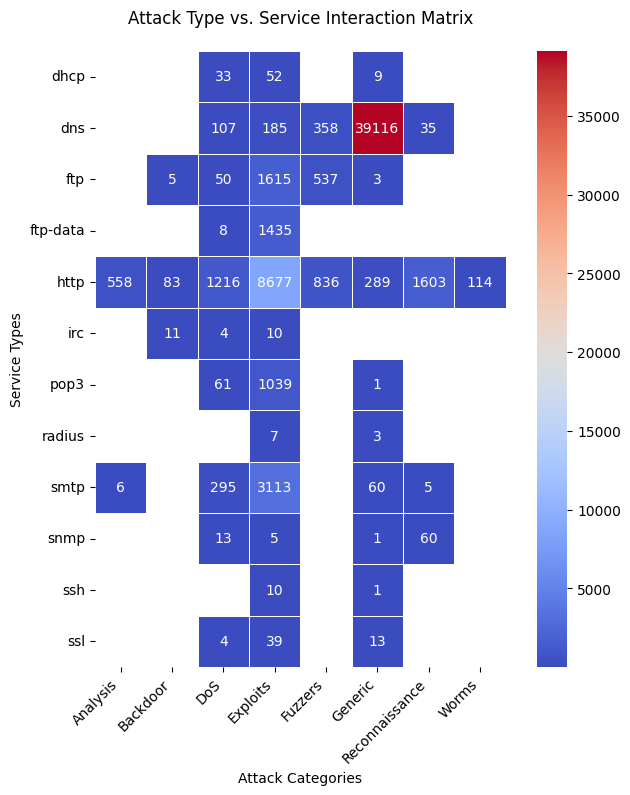

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(interaction_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5,
            mask=interaction_matrix.isna(), fmt='g', annot_kws={"size": 10}, square=True)
plt.title("Attack Type vs. Service Interaction Matrix", pad=20)
plt.xlabel("Attack Categories")
plt.ylabel("Service Types")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Are transaction protocols relevant for detecting attacks?

In this chapter, we explore if the channel affects security threats

In [ ]:
attack_df['proto'].value_counts().get('-', 0)

0

On the other hand, the column `proto` (transaction protocol) has no sparse data on it, meaning each existing attack in data can be linked to some existing protocol

In [ ]:
# Protocol distribution
attack_df['proto'].value_counts()

,count
proto,
udp,49361
tcp,40825
unas,12084
ospf,2531
sctp,1150
...,...
argus,98
bbn-rcc,98
hmp,98


In [ ]:
attack_df['proto'].isna().sum() # all attacks occurred in some transaction protocol

np.int64(0)

In [ ]:
# Create interaction matrix
interaction_matrix2 = pd.crosstab(attack_df['proto'], attack_df['attack_cat']).replace(0, np.nan)
interaction_matrix2

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
proto,,,,,,,,,
3pc,5.0,5,34,44,5,1.0,6,NaN,NaN
a/n,5.0,5,34,44,5,1.0,6,NaN,NaN
aes-sp3-d,5.0,5,34,44,5,1.0,6,NaN,NaN
any,15.0,15,102,132,15,3.0,18,NaN,NaN
argus,5.0,4,34,44,5,NaN,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
wsn,5.0,5,34,44,5,1.0,6,NaN,NaN
xnet,5.0,4,34,44,5,1.0,6,NaN,NaN
xns-idp,5.0,4,34,44,5,1.0,6,NaN,NaN


In [ ]:
print(interaction_matrix2["Shellcode"].isna().sum())
print(interaction_matrix2["Worms"].isna().sum())

127
127


A couple of insights here: **Shellcode and Worms** attacks occur in two of the 129 protocol transaction each one

In [ ]:
interaction_matrix2[interaction_matrix2["Shellcode"].notna() & interaction_matrix2["Worms"].notna()]

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
proto,,,,,,,,,
tcp,564.0,272,2281,19689,11761,486.0,5100,557.0,115.0
udp,NaN,28,358,624,4945,39229.0,3586,576.0,15.0


Particularly, these two types of attacks occur through **TCP** (Transmission Control Protocol) and **UDP** (User Datagram Protocol)

## Item similarity computation

In [ ]:
# Measure similarity between attack types based on their service usage pattern (pearson's correlation)
item_similarity = cosine_similarity(interaction_matrix.fillna(0).T)
similarity_df = pd.DataFrame(item_similarity,
                             index=interaction_matrix.columns,
                             columns=interaction_matrix.columns)
similarity_df

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Worms
attack_cat,,,,,,,,
Analysis,1.000000,0.989512,0.968424,0.914225,0.791517,0.007404,0.999033,0.999942
Backdoor,0.989512,1.000000,0.958669,0.911507,0.813616,0.007316,0.988636,0.989569
DoS,0.968424,0.958669,1.000000,0.971123,0.813625,0.092503,0.968021,0.965960
Exploits,0.914225,0.911507,0.971123,1.000000,0.813700,0.026666,0.911368,0.910765
Fuzzers,0.791517,0.813616,0.813625,0.813700,1.000000,0.344848,0.798211,0.791563
Generic,0.007404,0.007316,0.092503,0.026666,0.344848,1.000000,0.029200,0.007388
Reconnaissance,0.999033,0.988636,0.968021,0.911368,0.798211,0.029200,1.000000,0.999058
Worms,0.999942,0.989569,0.965960,0.910765,0.791563,0.007388,0.999058,1.000000


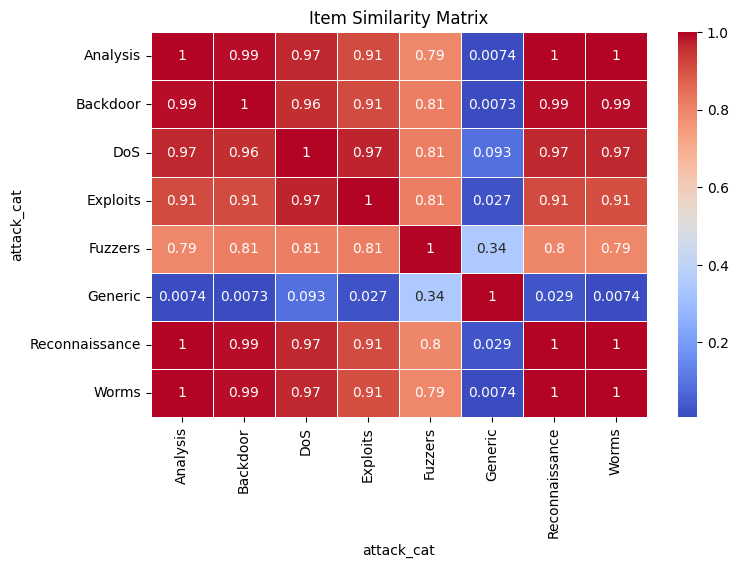

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(similarity_df, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Item Similarity Matrix")
plt.show()

In [ ]:
item_similarity = cosine_similarity(interaction_matrix2.fillna(0).T)
similarity_df2 = pd.DataFrame(item_similarity,
                             index=interaction_matrix2.columns,
                             columns=interaction_matrix2.columns)
similarity_df2

attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
attack_cat,,,,,,,,,
Analysis,1.000000,0.957095,0.979077,0.807950,0.612305,0.009886,0.598974,0.433865,0.618888
Backdoor,0.957095,1.000000,0.994298,0.632202,0.429189,0.048768,0.458197,0.307916,0.402299
DoS,0.979077,0.994298,1.000000,0.696707,0.511668,0.083388,0.535379,0.386144,0.483602
Exploits,0.807950,0.632202,0.696707,1.000000,0.911457,0.043205,0.831524,0.691292,0.958750
Fuzzers,0.612305,0.429189,0.511668,0.911457,1.000000,0.398643,0.974673,0.918343,0.963072
Generic,0.009886,0.048768,0.083388,0.043205,0.398643,1.000000,0.581404,0.727417,0.141612
Reconnaissance,0.598974,0.458197,0.535379,0.831524,0.974673,0.581404,1.000000,0.975068,0.879180
Shellcode,0.433865,0.307916,0.386144,0.691292,0.918343,0.727417,0.975068,1.000000,0.782289
Worms,0.618888,0.402299,0.483602,0.958750,0.963072,0.141612,0.879180,0.782289,1.000000


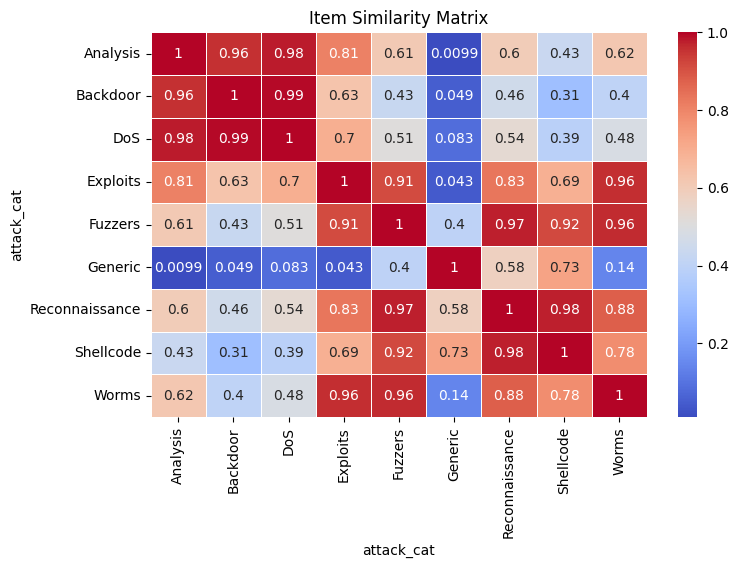

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(similarity_df2, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Item Similarity Matrix")
plt.show()

## Predict top-N similar user attacks

In [ ]:
def get_top_similar_attacks(target_attack, similarity_matrix, top_n=3):
    # Sort similarities in descending order and exclude self-similarity
    similar_attacks = (similarity_df2[target_attack]
                       .sort_values(ascending=False)
                       .drop(target_attack)
                       .head(top_n)
                       )
    return similar_attacks

In [ ]:
attacks = list(train['attack_cat'].unique())[1:]
attacks

['Backdoor',
 'Analysis',
 'Fuzzers',
 'Shellcode',
 'Reconnaissance',
 'Exploits',
 'DoS',
 'Worms',
 'Generic']

In [ ]:
for attack in attacks:
    top_similar = get_top_similar_attacks(attack, similarity_df2)
    print("Top 3 attacks similar to", attack, "\n", top_similar, "\n")

Top 3 attacks similar to Backdoor 
 attack_cat
DoS         0.994298
Analysis    0.957095
Exploits    0.632202
Name: Backdoor, dtype: float64 

Top 3 attacks similar to Analysis 
 attack_cat
DoS         0.979077
Backdoor    0.957095
Exploits    0.807950
Name: Analysis, dtype: float64 

Top 3 attacks similar to Fuzzers 
 attack_cat
Reconnaissance    0.974673
Worms             0.963072
Shellcode         0.918343
Name: Fuzzers, dtype: float64 

Top 3 attacks similar to Shellcode 
 attack_cat
Reconnaissance    0.975068
Fuzzers           0.918343
Worms             0.782289
Name: Shellcode, dtype: float64 

Top 3 attacks similar to Reconnaissance 
 attack_cat
Shellcode    0.975068
Fuzzers      0.974673
Worms        0.879180
Name: Reconnaissance, dtype: float64 

Top 3 attacks similar to Exploits 
 attack_cat
Worms             0.958750
Fuzzers           0.911457
Reconnaissance    0.831524
Name: Exploits, dtype: float64 

Top 3 attacks similar to DoS 
 attack_cat
Backdoor    0.994298
Analysis  

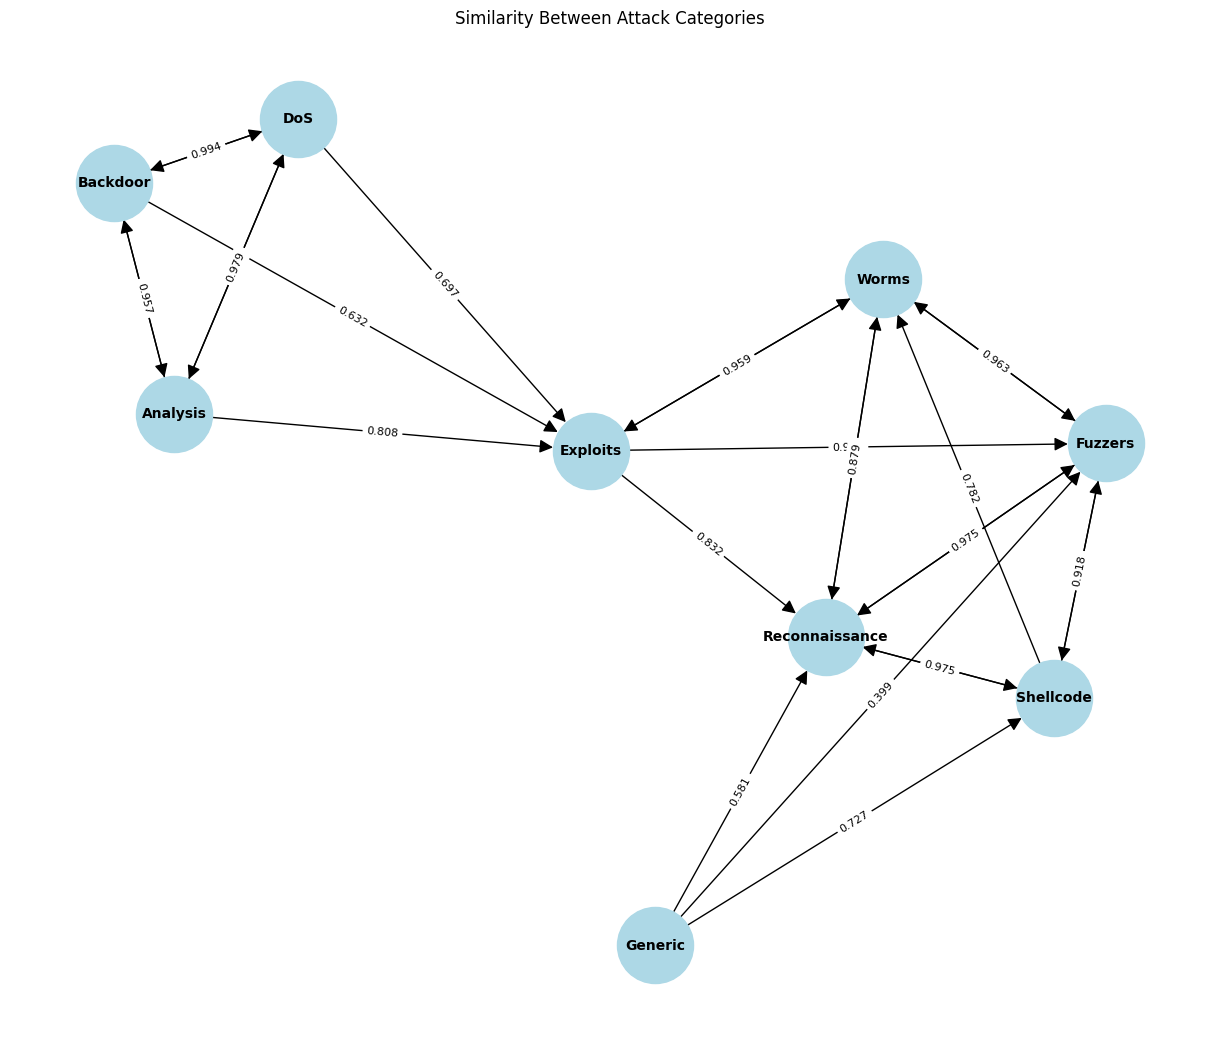

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with similarity scores (from your data)
edges = [
    ("Backdoor", "DoS", 0.994),
    ("Backdoor", "Analysis", 0.957),
    ("Backdoor", "Exploits", 0.632),
    ("Analysis", "DoS", 0.979),
    ("Analysis", "Backdoor", 0.957),
    ("Analysis", "Exploits", 0.808),
    ("Fuzzers", "Reconnaissance", 0.975),
    ("Fuzzers", "Worms", 0.963),
    ("Fuzzers", "Shellcode", 0.918),
    ("Shellcode", "Reconnaissance", 0.975),
    ("Shellcode", "Fuzzers", 0.918),
    ("Shellcode", "Worms", 0.782),
    ("Reconnaissance", "Shellcode", 0.975),
    ("Reconnaissance", "Fuzzers", 0.975),
    ("Reconnaissance", "Worms", 0.879),
    ("Exploits", "Worms", 0.959),
    ("Exploits", "Fuzzers", 0.911),
    ("Exploits", "Reconnaissance", 0.832),
    ("DoS", "Backdoor", 0.994),
    ("DoS", "Analysis", 0.979),
    ("DoS", "Exploits", 0.697),
    ("Worms", "Fuzzers", 0.963),
    ("Worms", "Exploits", 0.959),
    ("Worms", "Reconnaissance", 0.879),
    ("Generic", "Shellcode", 0.727),
    ("Generic", "Reconnaissance", 0.581),
    ("Generic", "Fuzzers", 0.399),
]

G.add_weighted_edges_from(edges)

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Similarity Between Attack Categories")
plt.savefig("attack_similarity_graph.jpg", format="jpg", dpi=300)
plt.show()

## Predict user attacks by top-N neighbors criteria

User-based collaborative filtering is a memory-based method that leverages historical data to predict whether a new user may face an attack and, if so, classifies it into one of nine types from the dataset


In [ ]:
# consider 175341 user ids
pred_df = train[['id', 'attack_cat']]
pred_df

,id,attack_cat
0,1,Normal
1,2,Normal
2,3,Normal
3,4,Normal
4,5,Normal
...,...,...
175336,175337,Generic
175337,175338,Shellcode
175338,175339,Generic
175339,175340,Generic


In [ ]:
# Save all unique user IDs
all_user_ids = pred_df['id'].unique()

# Normal in attack_cat means no attack, so put NaN
pred_df.loc[pred_df['attack_cat'] == 'Normal', 'attack_cat'] = np.nan

Users with no attack (0=Normal) are the **targets** for the later prediction

In [ ]:
# Interaction matrix
# Create user x attack matrix for non-Normal rows
user_attack_matrix = pd.crosstab(pred_df['id'], pred_df['attack_cat'])

# Reindex to include all users (Normal and non-Normal labels)
user_attack_matrix = user_attack_matrix.reindex(all_user_ids, fill_value=0)

print("Interaction matrix:", user_attack_matrix.shape)
user_attack_matrix

Interaction matrix: (175341, 9)


attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
id,,,,,,,,,
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
175337,0,0,0,0,0,1,0,0,0
175338,0,0,0,0,0,0,0,1,0
175339,0,0,0,0,0,1,0,0,0


Since computing **Pearson's correlation** for such a large matrix (size > 150,000) is computationally intensive, a random sample is extracted to allow the machine to process it without issues.

In [ ]:
# Take a sample of 5000 users
sampled_users = user_attack_matrix.sample(n=5000, random_state=42)

# Stratified sampling from known and unknown users
sampled_known = sampled_users[sampled_users.sum(axis=1) > 0]
sampled_unknown = sampled_users[sampled_users.sum(axis=1) == 0]

# Pearson's correlation
similarity_matrix = cosine_similarity(sampled_users)
similarity_df = pd.DataFrame(similarity_matrix,
                                   index=sampled_users.index,
                                   columns=sampled_users.index)

print("Sampled user similarity matrix shape:",similarity_df.shape)
similarity_df # square matrix, where 0=unknown attack and 1=attack

Sampled user similarity matrix shape: (5000, 5000)


id,15483,133350,80486,29973,18340,170501,165831,55216,37757,22161,...,93512,154465,146874,73134,97379,57479,145823,9277,1091,6986
id,,,,,,,,,,,,,,,,,,,,,
15483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133350,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80486,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
145823,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, predict attacks for **users with no known attack type (target=0)** by looking at their nearest neighbors.

*   Loop through target users and find their nearest neighbors
*   Compare them to known users to infer likely attack types
*   Recommend the most common attack type from those neighbors

In [ ]:
# Predict attack category for a random user id based on top N neighbors
def predict_attack_category(target_id, similarity_df, sampled_known, top_n=5):
    # Get the top N most similar neighbors
    top_neighbors = similarity_df.loc[target_id].nlargest(top_n).index
    print(f"Random selected target ID: {target_id}")
    print(f"Top neighbors: {top_neighbors.tolist()}")

    # Ensure that the top neighbors exist in the sampled_known index
    valid_neighbors = sampled_known.index.intersection(top_neighbors)

    if len(valid_neighbors) == 0:
        print("No valid neighbors found. Unable to predict attack category.")
        return None  # unknown

    # Get the attack vectors of the valid neighbors
    neighbor_attack_vectors = sampled_known.loc[valid_neighbors]

    # Count the attack categories among the neighbors
    attack_counts = neighbor_attack_vectors.sum(axis=0)

    # Find the most common attack category among the neighbors
    most_common_attack = attack_counts.idxmax()

    result_df = pd.DataFrame({
        'Target ID': [target_id],
        'Top Neighbors': [top_neighbors.tolist()],
        'Attack Category Counts': [attack_counts.tolist()],
        'Predicted Attack Category': [most_common_attack]
    })

    return neighbor_attack_vectors, attack_counts, result_df

# Select a random id from the similarity matrix
target_id = random.choice(similarity_df.index)

neighbor_attack_vectors, attack_counts, predicted_attack_df = predict_attack_category(target_id, similarity_df, sampled_known, top_n=5)

# Results
print("Attack vectors of neighbors:")
display(neighbor_attack_vectors)
print("\nAttack category counts:")
display(attack_counts)
predicted_attack_df

Random selected target ID: 118838
Top neighbors: [83977, 52190, 91316, 82963, 145861]
Attack vectors of neighbors:


attack_cat,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
id,,,,,,,,,
83977,0,0,0,0,0,0,0,1,0
52190,0,0,0,0,0,0,0,1,0
91316,0,0,0,0,0,0,0,1,0
82963,0,0,0,0,0,0,0,1,0
145861,0,0,0,0,0,0,0,1,0



Attack category counts:


,0
attack_cat,
Analysis,0
Backdoor,0
DoS,0
Exploits,0
Fuzzers,0
Generic,0
Reconnaissance,0
Shellcode,5
Worms,0


,Target ID,Top Neighbors,Attack Category Counts,Predicted Attack Category
0,118838,"[83977, 52190, 91316, 82963, 145861]","[0, 0, 0, 0, 0, 0, 0, 5, 0]",Shellcode


# **Results and discussion**

The application of PCA effectively reduced feature dimensionality while preserving key variance, improving model efficiency. K-Means clustering revealed meaningful groupings of traffic patterns, with optimal clusters found between k=3 and k=5. The KNN classifier achieved solid performance in detecting various types of intrusions, demonstrating good generalization on test data. The collaborative filtering system provided an innovative perspective by recommending potential threat types based on similarity to past attack profiles. Overall, the combined techniques offered complementary insights into network traffic behavior, enhancing the robustness of the intrusion detection system.

# **Conclusion**

## Answer to research questions

**Answering questions of the Introduction section**

**1.**  

Yes, PCA can improve performance by reducing noise and redundancy, speeding up training, and simplifying data. However, it may reduce interpretability, and the optimal number of components depends on the dataset (e.g., 2-3 PCs explained ~80% variance in UNSW-NB15).

**2.**  

K-Means is effective for unsupervised detection by grouping similar traffic patterns, but it requires manual labeling of clusters as normal or malicious. In contrast, KNN combined with PCA-reduced data achieved about 93% accuracy in your tests and is easy to implement, though it can be slow on large datasets and is sensitive to class imbalance.

**3.**

Yes, collaborative filtering can be effective in predicting co-occurring attacks by analyzing interactions between user IDs and attack categories, such as anticipating an Exploits attack following a DoS attack. However, its usefulness comes with caveats: it requires a rich history of past attack patterns to make accurate predictions and faces challenges with the cold-start problem when new or previously unseen threats emerge.

**4.**  

For the UNSW-NB15 dataset, each technique offers distinct advantages and drawbacks. PCA excels at dimensionality reduction, making models faster and more efficient, though it can reduce the interpretability of individual features. K-Means is valuable for unsupervised detection and can help uncover novel attacks, but it requires post-processing to label clusters and is sensitive to noise in the data. KNN achieves high accuracy (around 93%) and is straightforward to implement, but it becomes slow and resource-intensive with large datasets. Collaborative filtering can reveal hidden attack patterns and suggest potential threats, yet its effectiveness is limited if attack interactions are sparse. Overall, combining PCA and KNN is generally the best approach for UNSW-NB15, balancing speed and accuracy, while collaborative filtering serves as a useful exploratory tool.

## Limitations and future work

This project is limited by the representativeness of the NUSW-NB15 dataset and the simplicity of the models used. Future work could involve testing more advanced deep learning algorithms, such as Random Forest or Support Vector Machines, and integrate real-time detection capabilities. This would allow for better evaluation performance across a wider range of intrusions, improving accuracy and other metrics.